In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dataset = pd.read_csv('hypothyroid.csv')
dataset.head()

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [ ]:
dataset.columns

Index(['target', 'Age', 'Sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
dataset = dataset.rename(columns = {dataset.columns[0]:"target"})

In [ ]:
dataset["target"].value_counts()

0    3012
1     151
Name: target, dtype: int64

In [ ]:
dataset["target"] = dataset["target"].map({"negative":0,"hypothyroid":1})

In [ ]:
print("Unique categories in the column 'pregnant'", dataset['pregnant'].unique())
print("Count of categories in the column 'pregnant' \n", dataset["pregnant"].value_counts())

Unique categories in the column 'pregnant' ['f' 't']
Count of categories in the column 'pregnant' 
 f    3100
t      63
Name: pregnant, dtype: int64


In [ ]:
print("Unique categories in the column 'T3 measured'", dataset['T3_measured'].unique())
print("Count of categories in the column 'T3 measured' \n", dataset["T3_measured"].value_counts())

Unique categories in the column 'T3 measured' ['y' 'n']
Count of categories in the column 'T3 measured' 
 y    2468
n     695
Name: T3_measured, dtype: int64


In [ ]:
print("Unique categories in the column 'Sex'", dataset['Sex'].unique())
print("Count of categories in the column 'Sex' \n", dataset["Sex"].value_counts())

Unique categories in the column 'Sex' ['M' 'F' '?']
Count of categories in the column 'Sex' 
 F    2182
M     908
?      73
Name: Sex, dtype: int64


In [ ]:
dataset = dataset.replace({'f':0,'t':1, 'y':1, 'n':0, 'M':0, 'F':1})
dataset.head()

,target,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,NaN,72,0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.6,1,15,1,1.48,1,10,0,?
1,NaN,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.7,1,19,1,1.13,1,17,0,?
2,NaN,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.2,1,4,1,1,1,0,0,?
3,NaN,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.4,1,6,1,1.04,1,6,0,?
4,NaN,77,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57,1,1.28,1,44,0,?


In [ ]:
# Replacing ? into NaN values 
dataset.replace(to_replace='?', inplace=True, value=np.NaN)

In [ ]:
# Count the number of null values
dataset.isnull().sum()

In [ ]:
# Dropping the TBG column as it contains extremely high number of null values
dataset.drop('TBG', axis = 1, inplace=True)

In [ ]:
# Selecting columns with data type as 'object'
columns = dataset.columns[dataset.dtypes.eq('object')]

# Convert to numeric values
dataset[columns] = dataset[columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
dataset.hist(figsize = (20,20));

In [ ]:
# List of columns containing null values
dataset.columns[dataset.isnull().any()].tolist() 

['target', 'Age', 'Sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [ ]:
# Replacing null values by mean 
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)
dataset['T4U'].fillna(dataset['T4U'].mean(), inplace = True)

# Replacing null values by median
dataset['TSH'].fillna(dataset['TSH'].mean(), inplace = True)
dataset['T3'].fillna(dataset['T3'].median(), inplace = True)
dataset['TT4'].fillna(dataset['TT4'].median(), inplace = True)
dataset['FTI'].fillna(dataset['FTI'].median(), inplace = True)

# The gender data looks to be imbalanced with 0 lesser than 1
# Replacing null values with 0
dataset['Sex'].fillna(0, inplace = True)

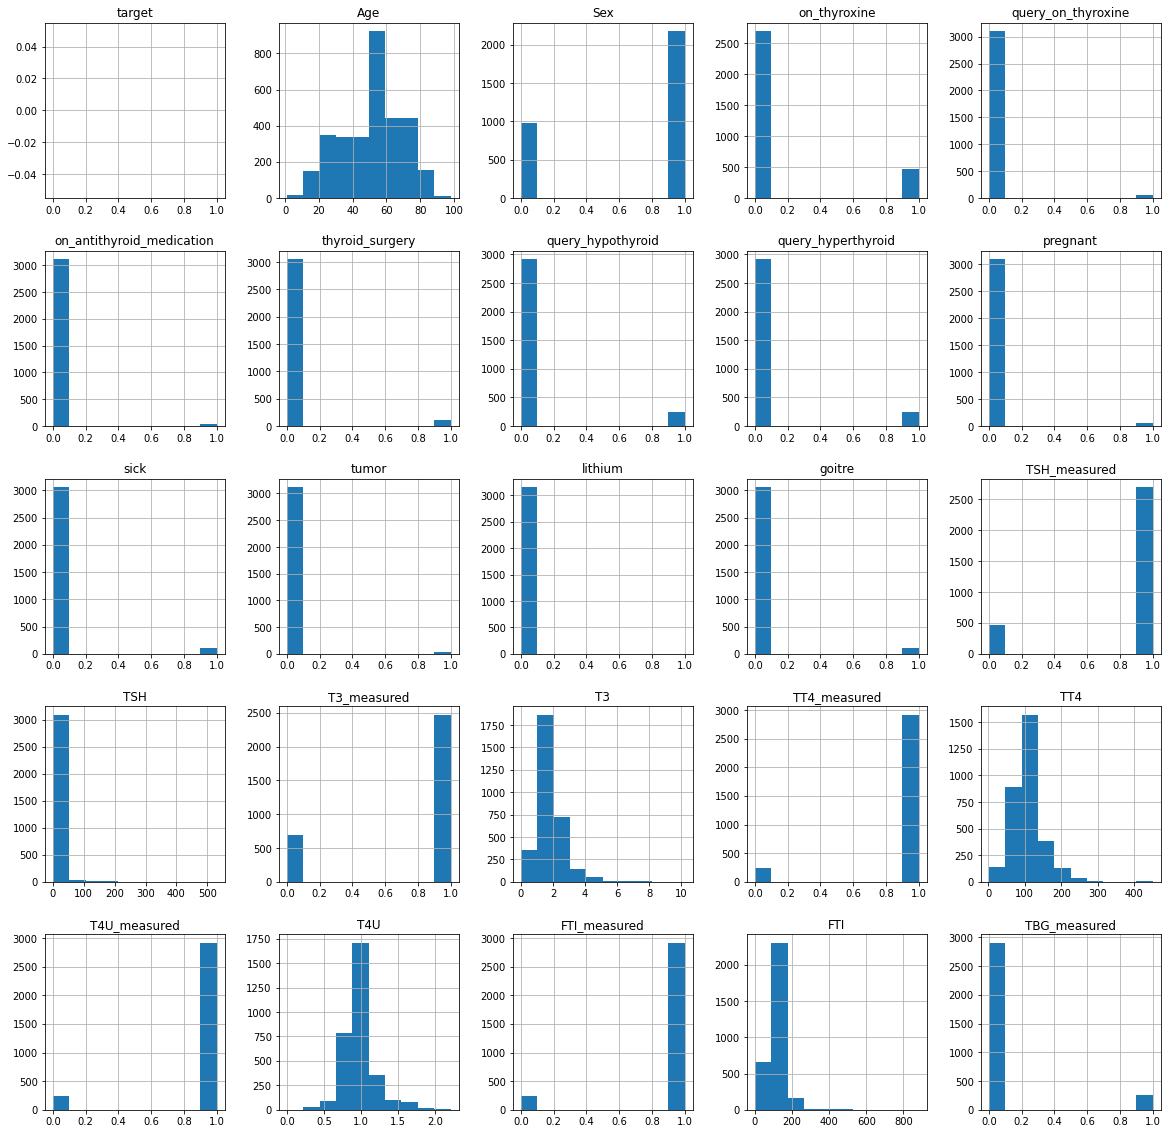

In [ ]:
# Plot the histogram of different features
plot_cleaned = dataset.hist(figsize = (20,20))

In [ ]:
# Check for the number of null values
dataset.isnull().sum()

target                       3163
Age                             0
Sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                             0
T3_measured                     0
T3                              0
TT4_measured                    0
TT4                             0
T4U_measured                    0
T4U                             0
FTI_measured                    0
FTI                             0
TBG_measured                    0
dtype: int64

In [ ]:
# Features
X = dataset.drop('target', axis = 1) # selecting all columns except the target
# Target variable
y = dataset['target']

In [ ]:
print(X.shape, y.shape)

(3163, 24) (3163,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Input
model = Sequential()
# Hidden layer
model.add(Dense(64, kernel_initializer='uniform', input_dim=24, activation='relu'))
# Output layer
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
result = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=40,  verbose=2)

In [ ]:
# accuracy of Ann model calculation

loss, acc = model.evaluate(X_test, y_test)

# Print the loss and accuracy score for the model
print("%s: %.2f%%" % (model.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model.metrics_names[1], acc*100))

20/20 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
loss: nan%
accuracy: 0.00%


In [ ]:
# model.save('hypothyroid_ANN.h5')

In [ ]:
# initialize random forest
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=24,criterion='entropy',random_state=0)
rf.fit(X_train, y_train)

ValueError: ignored

In [ ]:
rf_predict = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(rf_predict, y_test)
print('Random Forest Accuracy: ',ac * 100)

Random Forest Accuracy:  98.89415481832543


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf.predict(X_test))

array([[595,   1],
       [  6,  31]])

In [ ]:
import joblib as jb
model_rf = jb.dump(rf, 'hypothyroid.joblib')
# Load the model from the file
model_rf = jb.load('hypothyroid.joblib')



In [ ]:
# svm algorithm model accuracy 

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test, y_test)*100
print(" Accuracy of SVM Algorithm: {:.2f}%".format(acc))

 Accuracy of SVM Algorithm: 97.47%


In [ ]:
from sklearn.preprocessing import MinMaxScaler
model = jb.load('/content/hypothyroid.joblib')
    
X = [[72.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      1, 30.0, 1, 0.6, 1, 15.0, 1, 1.48, 1, 10.0, 0]]
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(X)

check = [72.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      1, 30.0, 1, 0.6, 1, 15.0, 1, 1.48, 1, 10.0, 0]
float_features = [float(x) for x in check]
final_features = [np.array(float_features)]
prediction = model.predict(sc.transform(final_features))

